# Análise de Acidentes de Trânsito no Brasil

Este notebook tem como objetivo analisar dados de acidentes de trânsito disponibilizados pela Polícia Rodoviária Federal (PRF). A análise busca identificar padrões temporais e fatores relevantes nos acidentes ocorridos.

In [1]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Subindo o arquivo csv para o Google Colab
from google.colab import files
upload = files.upload()

Saving datatran2024.csv to datatran2024.csv


In [3]:
# Carregando os dados

df = pd.read_csv("datatran2024.csv", encoding = "latin1", sep = ";")
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,-18.482610,-39.923790,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT


## Limpeza e Preparação dos Dados

Criação de coluna adicionais para facilitar a análise: ano, mês e nome do dia da semana.

In [6]:
df["data_inversa"] = pd.to_datetime(df["data_inversa"], format = "%Y-%m-%d", errors = "coerce")
df["ano"] = df["data_inversa"].dt.year
df["mes"] = df["data_inversa"].dt.month
df["dia_semana_nome"] = df["data_inversa"].dt.day_name()

df[["data_inversa", "ano", "mes", "dia_semana_nome"]].head()

,data_inversa,ano,mes,dia_semana_nome
0,2024-01-01,2024,1,Monday
1,2024-01-01,2024,1,Monday
2,2024-01-01,2024,1,Monday
3,2024-01-01,2024,1,Monday
4,2024-01-01,2024,1,Monday


## Análise: Quantidade de Acidentes por Mês no ano de 2024

Gerando gráficonpara visualizar a evolução da quantidade de acidentes ao longo do ano de 2024.

In [8]:
acidentes_por_mes = df.groupby("mes").size().reset_index(name = "quantidade_acidentes")
acidentes_por_mes

,mes,quantidade_acidentes
0,1,5755
1,2,5280
2,3,5957
3,4,5835
4,5,6186
5,6,6225
6,7,6401
7,8,6167
8,9,6222
9,10,6406


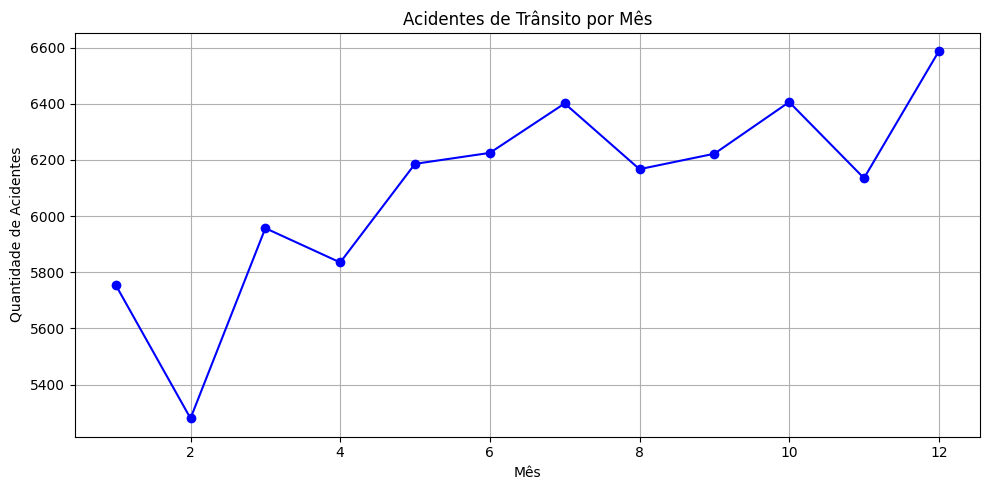

In [10]:
plt.figure(figsize = (10,5))
plt.plot(acidentes_por_mes["mes"], acidentes_por_mes["quantidade_acidentes"], marker = 'o', linestyle = '-', color = 'blue')
plt.title("Acidentes de Trânsito por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Acidentes")
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusões Iniciais

- Foi possível observar um aumento no número de acidentes ao longo dos meses, tendo seu menor número no mês de fevereiro e o maior no mês de dezembro.
- Algumas tendências podem estar relacionadas a fatores externos como políticas públicas, fiscalização, datas comemorativas entre outros.

As próximas análises incluirão a investigação por dia da semana e tipo de acidente.